<a href="https://colab.research.google.com/github/nashira-sy/Rice-Leaf-Disease-Prediction-DenseNet/blob/main/RiceLeafDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras -tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
#basics
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#utility & processing
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers


#cnn architecture
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#keras tuner
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

#transfer learning
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.xception import Xception

#warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#dowload dataset
#https://drive.google.com/file/d/16MZje6fbf0yZANdiVSstfK9UMnu7Qu6t/view?usp=drive_link
!gdown 16MZje6fbf0yZANdiVSstfK9UMnu7Qu6t

Downloading...
From: https://drive.google.com/uc?id=16MZje6fbf0yZANdiVSstfK9UMnu7Qu6t
To: /content/DatasetPadi.zip
100% 282M/282M [00:02<00:00, 95.2MB/s]


In [ ]:
#unzip dataset
%%capture
!unzip DatasetPadi.zip;

In [ ]:
input_shape_2D=(224,224)
input_shape_3D= (224,224,3)
seed=1
batch_size=24
epochs=50
stopper=EarlyStopping(patience=5)

In [ ]:
data_ds= tf.keras.utils.image_dataset_from_directory(
    directory='/content/DatasetPadi',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=None,
    image_size=input_shape_2D,
    seed=seed
)

Found 2628 files belonging to 6 classes.


In [ ]:
#class labels
class_names = data_ds.class_names

print("Class Names:", class_names)

Class Names: ['BacterialBlight', 'BrownSpot', 'Healthy', 'LeafBlast', 'LeafScald', 'Tungro']


In [ ]:
X=[]
y= []

for image, label in data_ds.batch(32):
  for img, lab in zip(image, label):
    X.append(img)
    y.append(lab.numpy())


In [ ]:
# converting to numpy array
X= np.array(X)
y= np.array(y)

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [ ]:
#Normalization
X_train = X_train/255
X_test = X_test/255

In [ ]:
print("shape of X_train:", X_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of y_test:", y_test.shape)

shape of X_train: (1971, 224, 224, 3)
shape of y_train: (1971,)
shape of X_test: (657, 224, 224, 3)
shape of y_test: (657,)


In [ ]:
y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True)

**CNN dasar**

In [ ]:
base_model=Sequential()

# adding first convloutional layer
base_model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape_3D, kernel_regularizer=regularizers.l2(0.001)))
base_model.add(MaxPooling2D())

# adding second convloutional layer
base_model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
base_model.add(MaxPooling2D())

# adding third convloutional layer
base_model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
base_model.add(MaxPooling2D())

# adding fourth convloutional layer
base_model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
base_model.add(MaxPooling2D())

# adding fully connected layers
# adding Dropout layer
base_model.add(tf.keras.layers.Dropout(0.4))

# adding flatten layer
base_model.add(Flatten())

#base_model.add(Dense(1024, activation='relu'))
base_model.add(Dense(512, activation='relu'))

#adding output layer : number of classes are 6
base_model.add(Dense(6, activation='softmax'))

In [ ]:
#architecture summary
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [ ]:
cnn_model = base_model
cnn_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history= cnn_model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                           validation_data=(X_test, y_test),
                           steps_per_epoch=len(X_train)//batch_size,
                           epochs=epochs
                           )

Epoch 1/50
82/82 [==============================] - 28s 322ms/step - loss: 1.8803 - accuracy: 0.2912 - val_loss: 1.3095 - val_accuracy: 0.4368
Epoch 2/50
82/82 [==============================] - 26s 319ms/step - loss: 1.2780 - accuracy: 0.5193 - val_loss: 0.9289 - val_accuracy: 0.6591
Epoch 3/50
82/82 [==============================] - 26s 319ms/step - loss: 1.1290 - accuracy: 0.5891 - val_loss: 0.7880 - val_accuracy: 0.7184
Epoch 4/50
82/82 [==============================] - 25s 302ms/step - loss: 0.9383 - accuracy: 0.6518 - val_loss: 0.9694 - val_accuracy: 0.6834
Epoch 5/50
82/82 [==============================] - 26s 318ms/step - loss: 0.9018 - accuracy: 0.6631 - val_loss: 0.6730 - val_accuracy: 0.7656
Epoch 6/50
82/82 [==============================] - 24s 290ms/step - loss: 0.8336 - accuracy: 0.6923 - val_loss: 0.8834 - val_accuracy: 0.6514
Epoch 7/50
82/82 [==============================] - 26s 315ms/step - loss: 0.8017 - accuracy: 0.7103 - val_loss: 0.8946 - val_accuracy: 0.6667

In [ ]:
def plot_performance(model_name, acc, val_acc, loss, val_loss):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('{} : Loss'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.subplot(1,2,2)
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('{} : Accuracy'.format(model_name), fontsize=12, fontweight='bold')

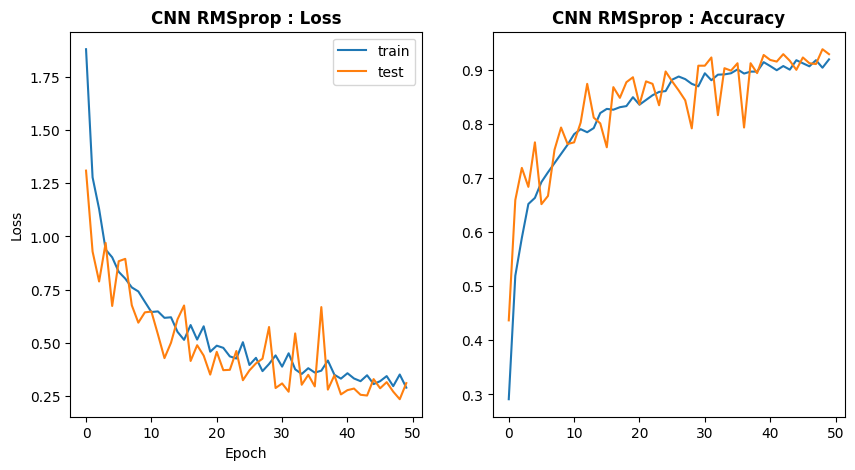

In [ ]:
plot_performance(model_name='CNN RMSprop',
                  acc=cnn_history.history['accuracy'],
                 val_acc=cnn_history.history['val_accuracy'],
                 loss=cnn_history.history['loss'],
                 val_loss=cnn_history.history['val_loss'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

21/21 [==============================] - 0s 17ms/step


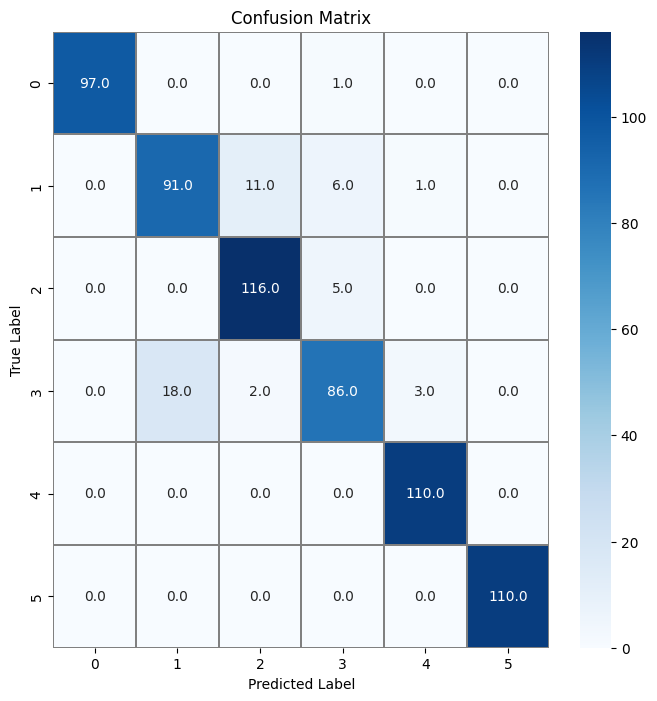

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = cnn_model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report


report = classification_report(Y_true, Y_pred_classes)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       0.83      0.83      0.83       109
           2       0.90      0.96      0.93       121
           3       0.88      0.79      0.83       109
           4       0.96      1.00      0.98       110
           5       1.00      1.00      1.00       110

    accuracy                           0.93       657
   macro avg       0.93      0.93      0.93       657
weighted avg       0.93      0.93      0.93       657



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(Y_true, Y_pred_classes,average='macro')
print ('Macro Average Precision : {}'.format(precision))
print ('Macro Average Recall   : {}'.format(recall))
print ('Macro Average f1 score  : {}'.format(fscore))
precision,recall,fscore,support=score(Y_true, Y_pred_classes,average='micro')
print ('Micro Average Precision : {}'.format(precision))
print ('Micro Average Recall   : {}'.format(recall))
print ('Micro Average f1 score  : {}'.format(fscore))

Macro Average Precision : 0.9294250821054283
Macro Average Recall   : 0.9287211358878226
Macro Average f1 score  : 0.9284658186219813
Micro Average Precision : 0.928462709284627
Micro Average Recall   : 0.928462709284627
Micro Average f1 score  : 0.928462709284627


**InceptionResNetV2**

In [ ]:
inception_base = tf.keras.applications.InceptionResNetV2(
    include_top = False,
    weights = 'imagenet',
    input_shape = input_shape_3D
)

#unfreezing the convloution layers
inception_base.trainable=True
set_trainable=False

for layer in inception_base.layers:
  if layer.name=='mixed9_0':
    set_trainable=True

  if set_trainable==True:
    layer.trainable=True

  else:
    layer.trainable=False

# building fully connected layers
inception_model= Sequential()

inception_model.add(inception_base)
inception_model.add(tf.keras.layers.GlobalAveragePooling2D())
inception_model.add(tf.keras.layers.Dropout(0.3))
inception_model.add(Dense(6, activation='softmax'))

219055592/219055592 [==============================] - 6s 0us/step


In [ ]:
inception_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_12 (Conv2D)          (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d_12[0][0]']           
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_norm

In [ ]:
inception_adam_model = inception_model
inception_adam_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
inception_adam_history= inception_adam_model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs
)

Epoch 1/50
82/82 [==============================] - 54s 498ms/step - loss: 1.0607 - accuracy: 0.5829 - val_loss: 0.6627 - val_accuracy: 0.7763
Epoch 2/50
82/82 [==============================] - 33s 397ms/step - loss: 0.6379 - accuracy: 0.7586 - val_loss: 0.5214 - val_accuracy: 0.8265
Epoch 3/50
82/82 [==============================] - 33s 399ms/step - loss: 0.5206 - accuracy: 0.8017 - val_loss: 0.4823 - val_accuracy: 0.8371
Epoch 4/50
82/82 [==============================] - 34s 420ms/step - loss: 0.4734 - accuracy: 0.8202 - val_loss: 0.4603 - val_accuracy: 0.8311
Epoch 5/50
82/82 [==============================] - 35s 421ms/step - loss: 0.4531 - accuracy: 0.8320 - val_loss: 0.4261 - val_accuracy: 0.8508
Epoch 6/50
82/82 [==============================] - 34s 417ms/step - loss: 0.4263 - accuracy: 0.8387 - val_loss: 0.4177 - val_accuracy: 0.8569
Epoch 7/50
82/82 [==============================] - 34s 417ms/step - loss: 0.4130 - accuracy: 0.8454 - val_loss: 0.3993 - val_accuracy: 0.8600

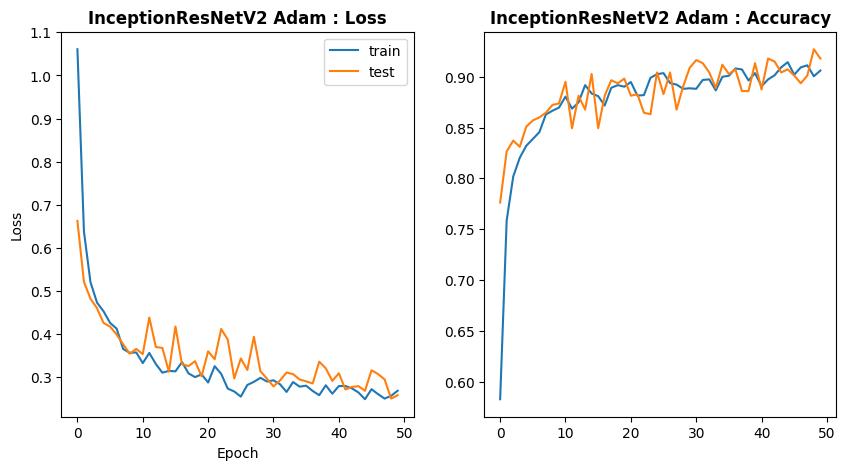

In [ ]:
plot_performance(model_name='InceptionResNetV2 Adam',
                  acc=inception_adam_history.history['accuracy'],
                 val_acc=inception_adam_history.history['val_accuracy'],
                 loss=inception_adam_history.history['loss'],
                 val_loss=inception_adam_history.history['val_loss'])

21/21 [==============================] - 4s 197ms/step


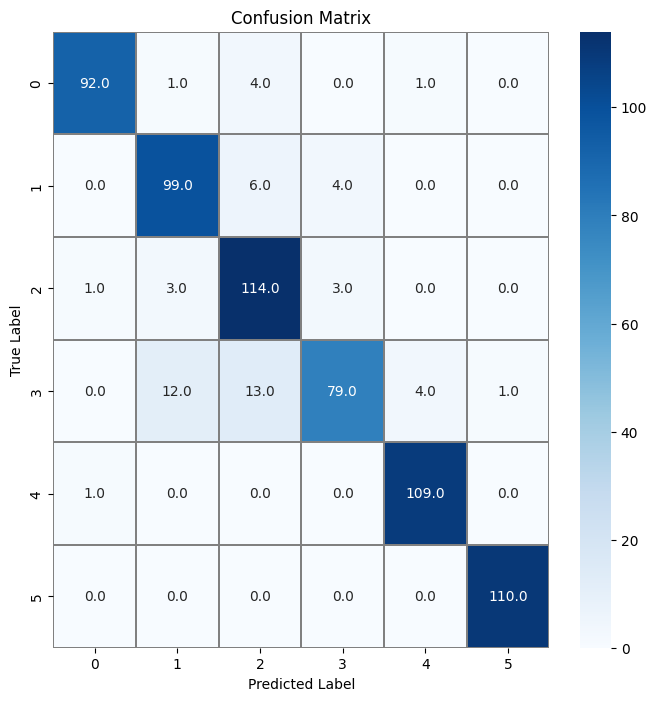

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = inception_model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report


report = classification_report(Y_true, Y_pred_classes)

print(report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        98
           1       0.86      0.91      0.88       109
           2       0.83      0.94      0.88       121
           3       0.92      0.72      0.81       109
           4       0.96      0.99      0.97       110
           5       0.99      1.00      1.00       110

    accuracy                           0.92       657
   macro avg       0.92      0.92      0.92       657
weighted avg       0.92      0.92      0.92       657



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(Y_true, Y_pred_classes,average='macro')
print ('Macro Average Precision : {}'.format(precision))
print ('Macro Average Recall   : {}'.format(recall))
print ('Macro Average f1 score  : {}'.format(fscore))
precision,recall,fscore,support=score(Y_true, Y_pred_classes,average='micro')
print ('Micro Average Precision : {}'.format(precision))
print ('Micro Average Recall   : {}'.format(recall))
print ('Micro Average f1 score  : {}'.format(fscore))

Macro Average Precision : 0.9229076251374754
Macro Average Recall   : 0.9174768140632551
Macro Average f1 score  : 0.9174881073478884
Micro Average Precision : 0.9178082191780822
Micro Average Recall   : 0.9178082191780822
Micro Average f1 score  : 0.9178082191780822


**DenseNet**

In [ ]:
DenseNet_base = tf.keras.applications.DenseNet201(input_shape=(224,224,3),
                            include_top=False,weights='imagenet',pooling='avg')
DenseNet_base.trainable = False

74836368/74836368 [==============================] - 1s 0us/step


In [ ]:
inputs = DenseNet_base.input
x = tf.keras.layers.Dense(128, activation='relu')(DenseNet_base.output)
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)
DenseNet_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
DenseNet_SGD_model = DenseNet_model
DenseNet_SGD_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
DenseNet_SGD_history= DenseNet_SGD_model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs)

Epoch 1/50
82/82 [==============================] - 57s 514ms/step - loss: 0.8858 - accuracy: 0.6929 - val_loss: 0.6102 - val_accuracy: 0.7869
Epoch 2/50
82/82 [==============================] - 33s 406ms/step - loss: 0.4864 - accuracy: 0.8490 - val_loss: 0.4840 - val_accuracy: 0.8265
Epoch 3/50
82/82 [==============================] - 31s 382ms/step - loss: 0.3782 - accuracy: 0.8706 - val_loss: 0.4014 - val_accuracy: 0.8493
Epoch 4/50
82/82 [==============================] - 33s 407ms/step - loss: 0.3421 - accuracy: 0.8855 - val_loss: 0.3554 - val_accuracy: 0.8798
Epoch 5/50
82/82 [==============================] - 33s 404ms/step - loss: 0.2939 - accuracy: 0.9086 - val_loss: 0.3329 - val_accuracy: 0.8721
Epoch 6/50
82/82 [==============================] - 33s 402ms/step - loss: 0.2773 - accuracy: 0.9070 - val_loss: 0.3106 - val_accuracy: 0.8965
Epoch 7/50
82/82 [==============================] - 31s 382ms/step - loss: 0.2693 - accuracy: 0.9096 - val_loss: 0.3455 - val_accuracy: 0.8721

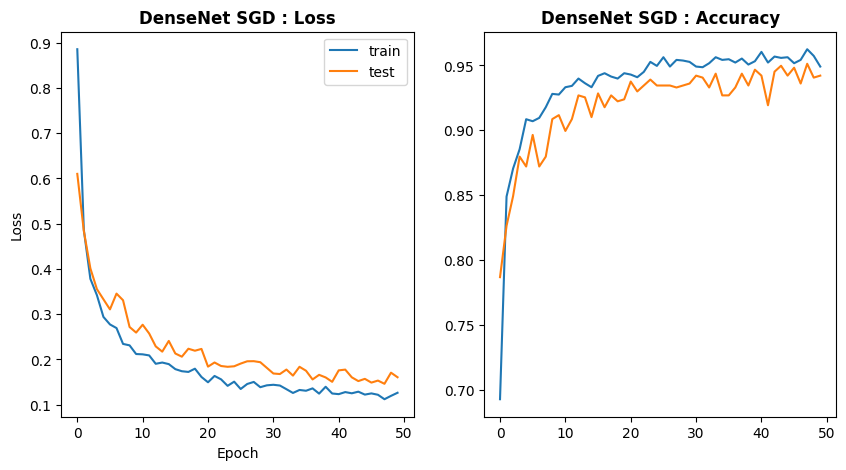

In [ ]:
plot_performance(model_name='DenseNet SGD',
                  acc=DenseNet_SGD_history.history['accuracy'],
                 val_acc=DenseNet_SGD_history.history['val_accuracy'],
                 loss=DenseNet_SGD_history.history['loss'],
                 val_loss=DenseNet_SGD_history.history['val_loss'])

21/21 [==============================] - 9s 154ms/step


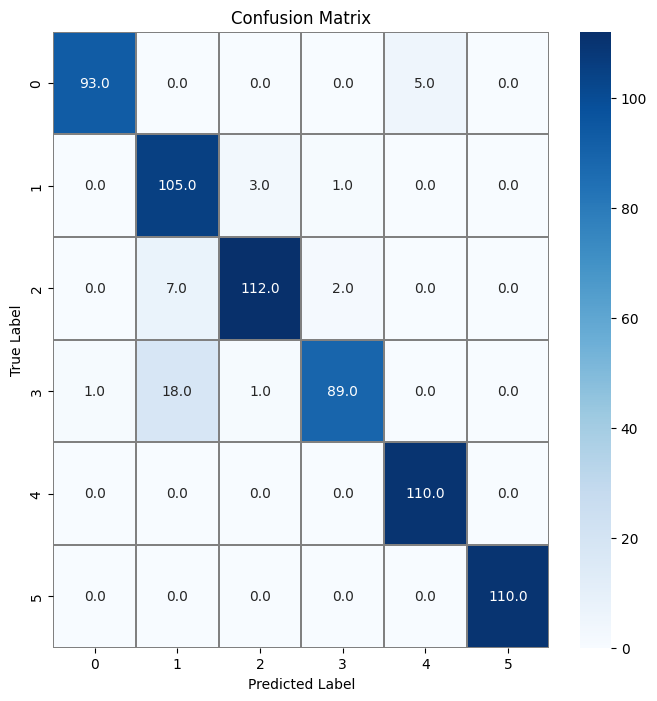

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = DenseNet_SGD_model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report


report = classification_report(Y_true, Y_pred_classes)

print(report)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        98
           1       0.81      0.96      0.88       109
           2       0.97      0.93      0.95       121
           3       0.97      0.82      0.89       109
           4       0.96      1.00      0.98       110
           5       1.00      1.00      1.00       110

    accuracy                           0.94       657
   macro avg       0.95      0.94      0.94       657
weighted avg       0.95      0.94      0.94       657



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(Y_true, Y_pred_classes,average='macro')
print ('Macro Average Precision : {}'.format(precision))
print ('Macro Average Recall   : {}'.format(recall))
print ('Macro Average f1 score  : {}'.format(fscore))
precision,recall,fscore,support=score(Y_true, Y_pred_classes,average='micro')
print ('Micro Average Precision : {}'.format(precision))
print ('Micro Average Recall   : {}'.format(recall))
print ('Micro Average f1 score  : {}'.format(fscore))

Macro Average Precision : 0.9477473824462564
Macro Average Recall   : 0.9424026567181577
Macro Average f1 score  : 0.9426514473787106
Micro Average Precision : 0.9421613394216134
Micro Average Recall   : 0.9421613394216134
Micro Average f1 score  : 0.9421613394216134


In [ ]:
#DenseNet Adam
DenseNet_Adam_model = DenseNet_model
DenseNet_Adam_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
DenseNet_Adam_history= DenseNet_Adam_model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs)

Epoch 1/50
82/82 [==============================] - 63s 528ms/step - loss: 0.5867 - accuracy: 0.7827 - val_loss: 0.4481 - val_accuracy: 0.8326
Epoch 2/50
82/82 [==============================] - 34s 413ms/step - loss: 0.2747 - accuracy: 0.9014 - val_loss: 0.2524 - val_accuracy: 0.9102
Epoch 3/50
82/82 [==============================] - 30s 368ms/step - loss: 0.2160 - accuracy: 0.9204 - val_loss: 0.2425 - val_accuracy: 0.9087
Epoch 4/50
82/82 [==============================] - 31s 379ms/step - loss: 0.1861 - accuracy: 0.9337 - val_loss: 0.2400 - val_accuracy: 0.9041
Epoch 5/50
82/82 [==============================] - 33s 407ms/step - loss: 0.1591 - accuracy: 0.9425 - val_loss: 0.2386 - val_accuracy: 0.9072
Epoch 6/50
82/82 [==============================] - 31s 380ms/step - loss: 0.1573 - accuracy: 0.9389 - val_loss: 0.1971 - val_accuracy: 0.9315
Epoch 7/50
82/82 [==============================] - 33s 407ms/step - loss: 0.1416 - accuracy: 0.9486 - val_loss: 0.2519 - val_accuracy: 0.9193

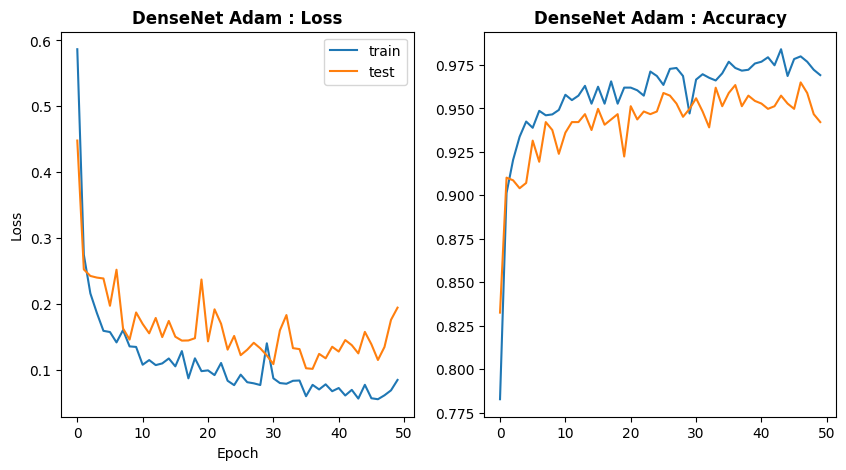

In [ ]:
plot_performance(model_name='DenseNet Adam',
                  acc=DenseNet_Adam_history.history['accuracy'],
                 val_acc=DenseNet_Adam_history.history['val_accuracy'],
                 loss=DenseNet_Adam_history.history['loss'],
                 val_loss=DenseNet_Adam_history.history['val_loss'])

21/21 [==============================] - 7s 154ms/step


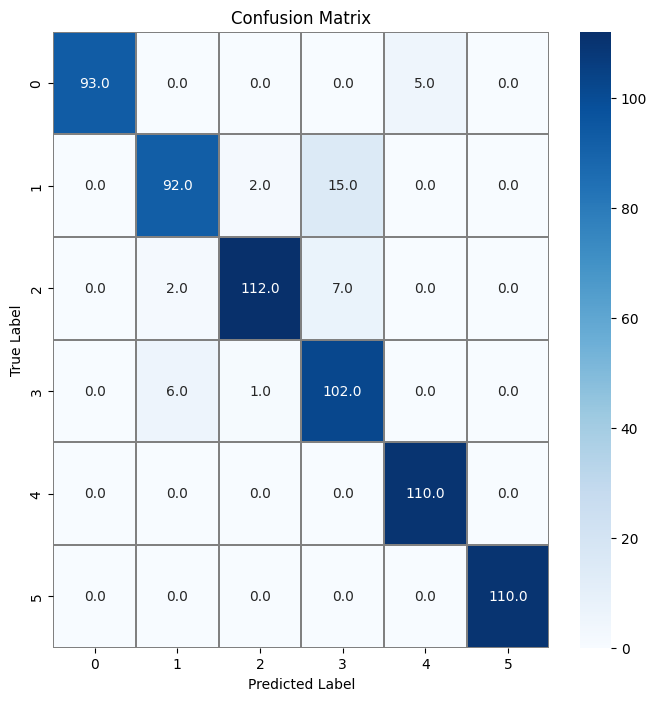

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = DenseNet_Adam_model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report


report = classification_report(Y_true, Y_pred_classes)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        98
           1       0.92      0.84      0.88       109
           2       0.97      0.93      0.95       121
           3       0.82      0.94      0.88       109
           4       0.96      1.00      0.98       110
           5       1.00      1.00      1.00       110

    accuracy                           0.94       657
   macro avg       0.95      0.94      0.94       657
weighted avg       0.95      0.94      0.94       657



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(Y_true, Y_pred_classes,average='macro')
print ('Macro Average Precision : {}'.format(precision))
print ('Macro Average Recall   : {}'.format(recall))
print ('Macro Average f1 score  : {}'.format(fscore))
precision,recall,fscore,support=score(Y_true, Y_pred_classes,average='micro')
print ('Micro Average Precision : {}'.format(precision))
print ('Micro Average Recall   : {}'.format(recall))
print ('Micro Average f1 score  : {}'.format(fscore))

Macro Average Precision : 0.9455025712949977
Macro Average Recall   : 0.9424026567181577
Macro Average f1 score  : 0.9427785942476278
Micro Average Precision : 0.9421613394216134
Micro Average Recall   : 0.9421613394216134
Micro Average f1 score  : 0.9421613394216134


In [ ]:
a#DenseNet RMSProp
DenseNet_RMS_model = DenseNet_model
DenseNet_RMS_model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
DenseNet_RMS_history= DenseNet_RMS_model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs)

Epoch 1/50
82/82 [==============================] - 66s 671ms/step - loss: 0.6251 - accuracy: 0.7699 - val_loss: 0.4058 - val_accuracy: 0.8371
Epoch 2/50
82/82 [==============================] - 31s 383ms/step - loss: 0.3221 - accuracy: 0.8788 - val_loss: 0.2793 - val_accuracy: 0.9072
Epoch 3/50
82/82 [==============================] - 35s 422ms/step - loss: 0.2432 - accuracy: 0.9106 - val_loss: 0.2175 - val_accuracy: 0.9239
Epoch 4/50
82/82 [==============================] - 34s 413ms/step - loss: 0.2341 - accuracy: 0.9076 - val_loss: 0.2541 - val_accuracy: 0.9102
Epoch 5/50
82/82 [==============================] - 33s 409ms/step - loss: 0.1864 - accuracy: 0.9309 - val_loss: 0.1833 - val_accuracy: 0.9330
Epoch 6/50
82/82 [==============================] - 31s 387ms/step - loss: 0.2034 - accuracy: 0.9240 - val_loss: 0.1766 - val_accuracy: 0.9330
Epoch 7/50
82/82 [==============================] - 33s 406ms/step - loss: 0.1552 - accuracy: 0.9425 - val_loss: 0.2008 - val_accuracy: 0.9163

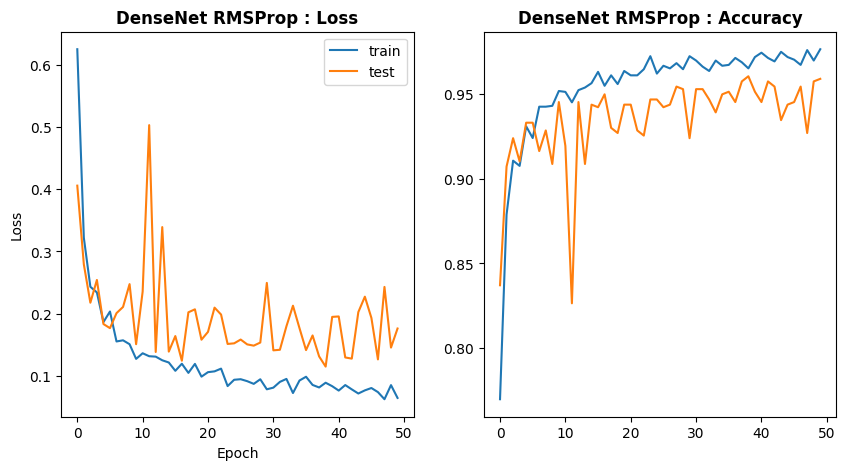

In [ ]:
plot_performance(model_name='DenseNet RMSProp',
                  acc=DenseNet_RMS_history.history['accuracy'],
                 val_acc=DenseNet_RMS_history.history['val_accuracy'],
                 loss=DenseNet_RMS_history.history['loss'],
                 val_loss=DenseNet_RMS_history.history['val_loss'])

21/21 [==============================] - 6s 151ms/step


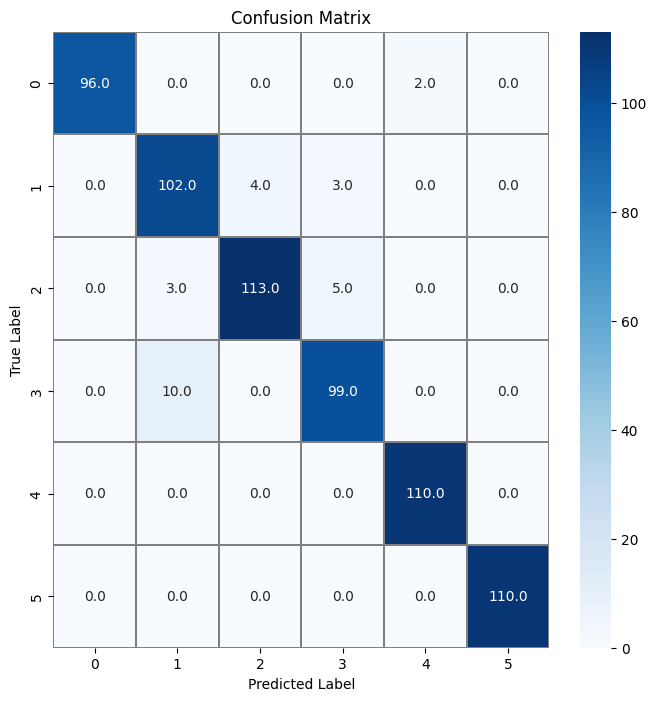

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = DenseNet_RMS_model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report


report = classification_report(Y_true, Y_pred_classes)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       0.89      0.94      0.91       109
           2       0.97      0.93      0.95       121
           3       0.93      0.91      0.92       109
           4       0.98      1.00      0.99       110
           5       1.00      1.00      1.00       110

    accuracy                           0.96       657
   macro avg       0.96      0.96      0.96       657
weighted avg       0.96      0.96      0.96       657



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(Y_true, Y_pred_classes,average='macro')
print ('Macro Average Precision : {}'.format(precision))
print ('Macro Average Recall   : {}'.format(recall))
print ('Macro Average f1 score  : {}'.format(fscore))
precision,recall,fscore,support=score(Y_true, Y_pred_classes,average='micro')
print ('Micro Average Precision : {}'.format(precision))
print ('Micro Average Recall   : {}'.format(recall))
print ('Micro Average f1 score  : {}'.format(fscore))

Macro Average Precision : 0.9600241649256277
Macro Average Recall   : 0.9595854719171769
Macro Average f1 score  : 0.9596070828257002
Micro Average Precision : 0.958904109589041
Micro Average Recall   : 0.958904109589041
Micro Average f1 score  : 0.958904109589041
